# 📦 Install Required Libraries

Make sure all required packages are installed. Here, we install `scikit-learn==1.4.2` to ensure compatibility with this notebook.

In [1]:
!pip install -q scikit-learn==1.4.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 42.7 MB/s eta 0:00:0000:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


# 📥 Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import joblib
import warnings
warnings.filterwarnings("ignore")

# 📊 Load Dataset

In [3]:
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 🔍 Exploratory Data Analysis

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
163,2,100,64,23,0,29.7,0.368,21,0
198,4,109,64,44,99,34.8,0.905,26,1
162,0,114,80,34,285,44.2,0.167,27,0
593,2,82,52,22,115,28.5,1.699,25,0
201,1,138,82,0,0,40.1,0.236,28,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 🧼 Data Preprocessing

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.duplicated().sum()

0

## 🚨 Checking for Invalid Zero Values

We'll check how many records contain a value of **0**, which may indicate missing or incorrect data.  
However, we'll **exclude the `Pregnancies` column**, since it's reasonable for someone to have **0 pregnancies**.

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    zero_count = (df[col] == 0).sum()
    print(f"Number of 0 values in the '{col}' column: {zero_count}")

Number of 0 values in the 'Glucose' column: 5
Number of 0 values in the 'BloodPressure' column: 35
Number of 0 values in the 'SkinThickness' column: 227
Number of 0 values in the 'Insulin' column: 374
Number of 0 values in the 'BMI' column: 11


In [13]:
col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[col] = df[col].replace(0, np.nan)

# imputer = SimpleImputer(strategy='mean')
# df[col] = imputer.fit_transform(df[col])

for c in col:
    df[c] = df[c].fillna(df[c].mean())

In [14]:
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    zero_count = (df[col] == 0).sum()
    print(f"Number of 0 values in the '{col}' column: {zero_count}")

Number of 0 values in the 'Glucose' column: 0
Number of 0 values in the 'BloodPressure' column: 0
Number of 0 values in the 'SkinThickness' column: 0
Number of 0 values in the 'Insulin' column: 0
Number of 0 values in the 'BMI' column: 0


In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


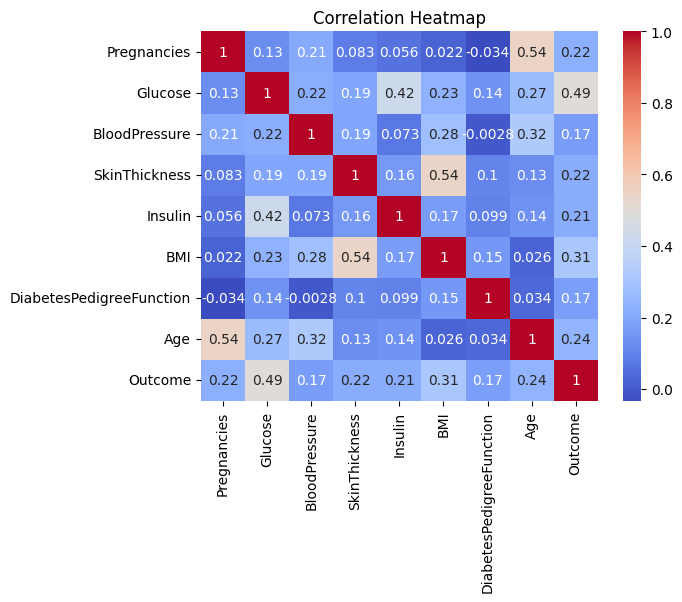

In [16]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## 📏 Feature Scaling (MinMax)

In [17]:
scaler = MinMaxScaler()

col = df.drop("Outcome", axis = 1).columns
df[col] = scaler.fit_transform(df[col])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.170130,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.170130,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.240798,0.170130,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1


## 🧪 Splitting Features and Target

In [18]:
X = df.drop("Outcome", axis  = 1)
y = df["Outcome"]

## 🧠 Feature Importance Analysis

We analyze which input features contribute the most to the model’s predictions using the built-in `.feature_importances_` attribute of the Random Forest model.

Normally, in datasets with a large number of features, we might filter and display only the top N features (e.g., top 10) to avoid clutter and focus on the most relevant ones.

However, since this dataset contains fewer than 10 features, we display all of them directly for full transparency.


In [19]:
rf = RandomForestClassifier(n_estimators = 100, random_state=42)
rf.fit(X, y)

feature_importances = pd.DataFrame({
    'features': X.columns, 
    'importances':rf.feature_importances_
})
feature_importances = feature_importances.sort_values(by='importances', ascending = False)
feature_importances

,features,importances
1,Glucose,0.259385
5,BMI,0.167773
7,Age,0.128885
6,DiabetesPedigreeFunction,0.120873
2,BloodPressure,0.086529
0,Pregnancies,0.083596
4,Insulin,0.083356
3,SkinThickness,0.069602


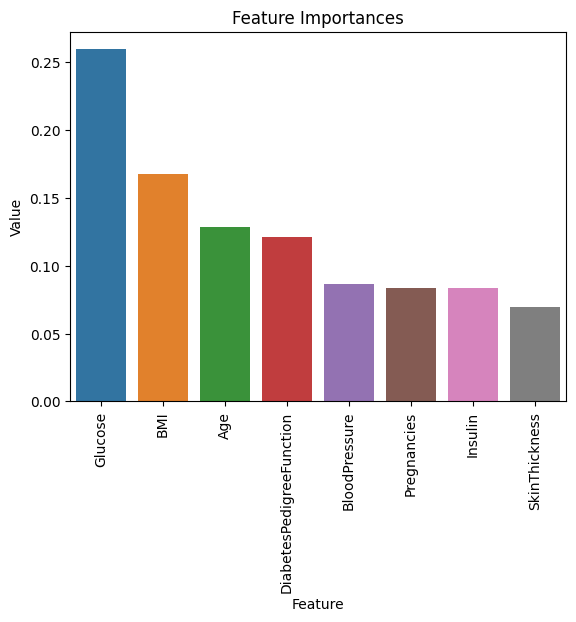

In [20]:
sns.barplot(x = "features", y = "importances", data = feature_importances)
plt.title("Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Value")
plt.xticks(rotation = 90)
plt.show()

## 📊 Data Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ⚖️ Handling Imbalanced Target Classes

Outcome
0    400
1    214
Name: count, dtype: int64


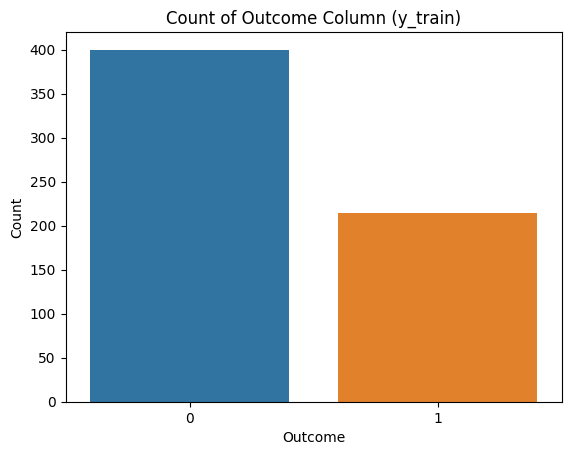

In [22]:
print(y_train.value_counts())

sns.countplot(x = y_train)
plt.title("Count of Outcome Column (y_train)")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

In [23]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Outcome
0    400
1    400
Name: count, dtype: int64


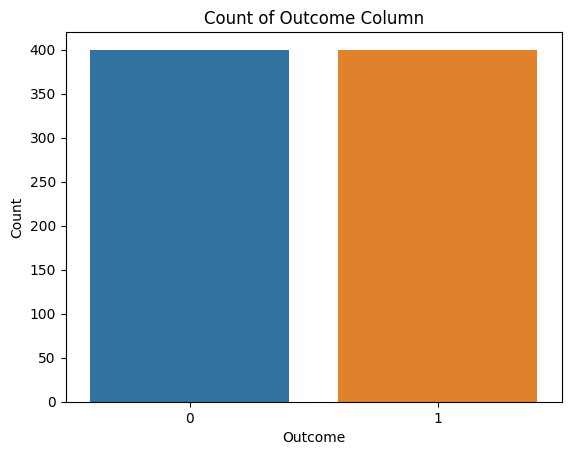

In [24]:
print(y_train_resampled.value_counts())

sns.countplot(x = y_train_resampled)
plt.title("Count of Outcome Column")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

# 🧠 Model Training

## Cross_val_score

In [25]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

In [26]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

all_model_scores = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=skf, scoring='accuracy')
    print(f"{name} - Accuracy: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")
    all_model_scores[name] = round(np.mean(scores), 4)

Logistic Regression - Accuracy: 0.7363 (+/- 0.0297)
Random Forest - Accuracy: 0.8037 (+/- 0.0175)
XGBoost - Accuracy: 0.7987 (+/- 0.0266)
Naive Bayes - Accuracy: 0.7262 (+/- 0.0195)
K-Nearest Neighbors - Accuracy: 0.7950 (+/- 0.0245)
Decision Tree - Accuracy: 0.7438 (+/- 0.0153)


In [27]:
pd.Series(all_model_scores).sort_values(ascending=False)

Random Forest          0.8038
XGBoost                0.7988
K-Nearest Neighbors    0.7950
Decision Tree          0.7438
Logistic Regression    0.7363
Naive Bayes            0.7262
dtype: float64

In [28]:
models.pop("Logistic Regression")
models.pop("Naive Bayes")
models.pop("Decision Tree")

DecisionTreeClassifier()

 -  Name: Random Forest
 -  Accuracy: 72.73%
 -  Recall: 71%
 -  Precision: 70%


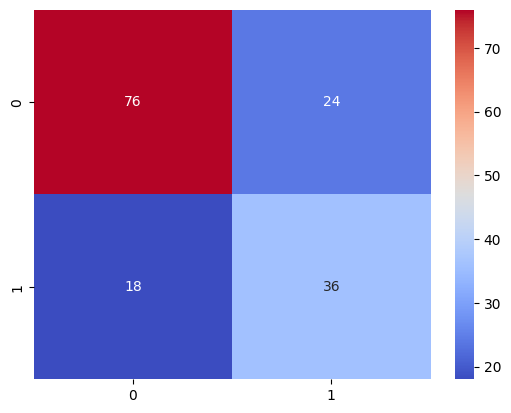

 -  Name: XGBoost
 -  Accuracy: 74.03%
 -  Recall: 72%
 -  Precision: 72%


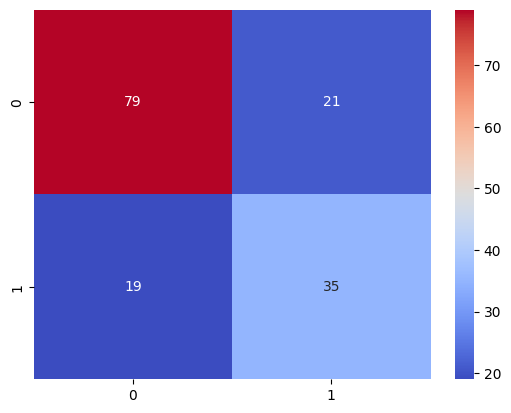

 -  Name: K-Nearest Neighbors
 -  Accuracy: 71.43%
 -  Recall: 72%
 -  Precision: 70%


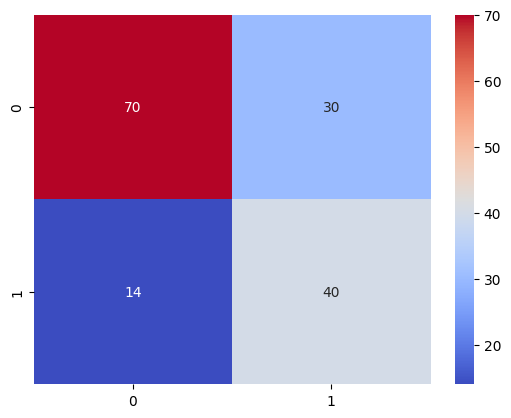

In [29]:
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    acc = round(accuracy_score(y_test, y_pred) * 100, 2)
    recall = round(recall_score(y_test, y_pred, average='macro') * 100)
    precision = round(precision_score(y_test, y_pred, average='macro') * 100)

    print(f" -  Name: {name}")
    print(f" -  Accuracy: {acc}%")
    print(f" -  Recall: {recall}%")
    print(f" -  Precision: {precision}%")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True, fmt='g', cmap="coolwarm")
    plt.show()

## Hyperparameter Tuning

In [30]:
# 1. Define the base model
rf = RandomForestClassifier(random_state=42)

# 2. Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],       # number of trees in the forest
    'max_depth': [None, 5, 10, 15],        # maximum depth of each tree
    'min_samples_split': [2, 5, 10],       # minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],         # minimum samples required at each leaf node
    'max_features': ['sqrt', 'log2']       # number of features considered for each split
}

# 3. Use Stratified K-Fold to maintain class balance in each fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. Perform Grid Search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1,        # utilize all available CPU cores
    verbose=1         # show progress but keep the output readable
)

# 5. Fit the model on your (resampled) data
grid_search.fit(X_train_resampled, y_train_resampled)

# 6. Display the best results
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.8262500000000002


# 🎯 Model Evaluation

 -  Accuracy: 74.03%
 -  Recall: 72%
 -  Precision: 72%


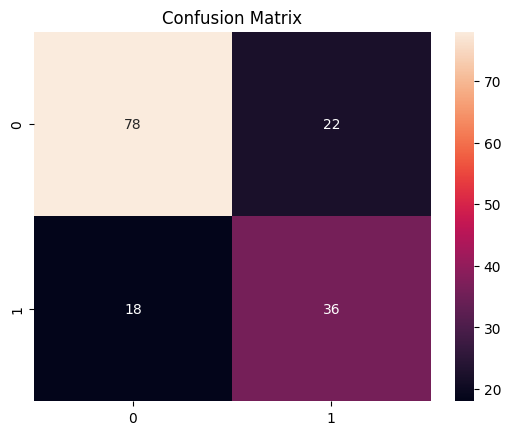

In [31]:
model_hp_tune = grid_search.best_estimator_
y_pred_hp_tune = model_hp_tune.predict(X_test)

acc = round(accuracy_score(y_test, y_pred_hp_tune) * 100, 2)
recall = round(recall_score(y_test, y_pred_hp_tune, average='macro') * 100)
precision = round(precision_score(y_test, y_pred_hp_tune, average='macro') * 100)
print(f" -  Accuracy: {acc}%")
print(f" -  Recall: {recall}%")
print(f" -  Precision: {precision}%")

cm = confusion_matrix(y_test, y_pred_hp_tune)
sns.heatmap(cm, annot=True, fmt='g')
plt.title(f"Confusion Matrix")
plt.show()

# 🚀 Try It Yourself!

In [32]:
print("Enter patient data for diabetes prediction:\n")

name = str(input("Patient name: "))
pregnancies = float(input("Number of pregnancies: "))
glucose = float(input("Glucose level: "))
blood_pressure = float(input("Blood pressure: "))
skin_thickness = float(input("Skin thickness: "))
insulin = float(input("Insulin level: "))
bmi = float(input("Body Mass Index (BMI): "))
dpf = float(input("Diabetes Pedigree Function (DPF): "))
age = float(input("Age: "))

input_value = [[pregnancies, glucose, blood_pressure, skin_thickness, insulin,
               bmi, dpf, age]]
# example: [[6, 148, 72, 35, 168, 43.1, 2.288, 33]] -> 1

# Make sure preprocessing is applied
input_data = scaler.transform(input_value)

# Predict using the trained model
prediction = model_hp_tune.predict(input_data)[0]
result = "Diabetic" if prediction == 1 else "Non-Diabetic"

print("\n\n\n\nPrediction Result:")
print(f"Name: {name}")
print(f"Prediction: {result}")

Enter patient data for diabetes prediction:



Patient name:  niko
Number of pregnancies:  6
Glucose level:  148
Blood pressure:  72
Skin thickness:  35
Insulin level:  168
Body Mass Index (BMI):  43.1
Diabetes Pedigree Function (DPF):  2.288
Age:  33






Prediction Result:
Name: niko
Prediction: Diabetic


In [33]:
print("Enter patient data for diabetes prediction:\n")

name = str(input("Patient name: "))
pregnancies = float(input("Number of pregnancies: "))
glucose = float(input("Glucose level: "))
blood_pressure = float(input("Blood pressure: "))
skin_thickness = float(input("Skin thickness: "))
insulin = float(input("Insulin level: "))
bmi = float(input("Body Mass Index (BMI): "))
dpf = float(input("Diabetes Pedigree Function (DPF): "))
age = float(input("Age: "))

input_value = [[pregnancies, glucose, blood_pressure, skin_thickness, insulin,
               bmi, dpf, age]]
# example: [[2, 100, 72, 23, 85, 27.5, 0.35, 28]] -> 0

# Make sure preprocessing is applied
input_data = scaler.transform(input_value)

# Predict using the trained model
prediction = model_hp_tune.predict(input_data)[0]
result = "Diabetic" if prediction == 1 else "Non-Diabetic"

print("\n\n\n\nPrediction Result:")
print(f"Name: {name}")
print(f"Prediction: {result}")

Enter patient data for diabetes prediction:



Patient name:  niko
Number of pregnancies:  2
Glucose level:  100
Blood pressure:  72
Skin thickness:  23
Insulin level:  85
Body Mass Index (BMI):  27.5
Diabetes Pedigree Function (DPF):  0.35
Age:  28






Prediction Result:
Name: niko
Prediction: Non-Diabetic


# 💾 Save Model

In [34]:
# 🔹 Save the Scaler
joblib.dump(scaler, "scaler.joblib")
print("✅ Scaler saved successfully!")

# 🔹 Save the Trained Model
joblib.dump(model_hp_tune, "model_hp_tune.joblib")
print("✅ Model saved successfully! 🔥")

✅ Scaler saved successfully!
✅ Model saved successfully! 🔥


# 🩺 Diabetes Prediction Project
### 👨‍💻 Authors:
- **Silvio Christian**
- **Stefanus Loveniko P.S.**

📅 Date: August 2025  
🔗 Project Type: Machine Learning Classification  